<a href="https://colab.research.google.com/github/lirichardil/PyTorch/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

https://www.learnpytorch.io/01_pytorch_workflow/

In [107]:
what_were_covering = { 1:"data (prepare and load)",
                      2:"build model",
                      3:"fitting the model to data (training)",
                      4:"making predictions and evaluating a model (inference)",
                      5:"saving and loading a model"

}

In [108]:
import torch
from torch import nn
# nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


nn contains a list of building blocks to create a Graph - Basically, as MLE, this is what we are doing.

## 1. Data (Preparing and loading)

Data can be almost anything ...

* Excel
* Images of any kind
* Video
* Audio like songs
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into numerical representation
2. Build a model to learn patterns in that numerical rep.


To create this, let's create some *known* data and apply linear regression.

we'll use a linearee regression formula to make a straight line with known parameters. (Parameters is what ML making perdiction on)

In [109]:
# Create * Known* Parameters

weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
# the unsqueeze adds an extra dimension to the data
# so it is the right shape
#print(f"X: {X}, shape: {X.shape}")
y = weight * X + bias
X[:10], y[:10] , len(X), len(y) # first 10 samples


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

now we will try to build a model to learn what y is based on x...
(of course we know what the y is)

### splitting the data into training and testing sets( one of the most important concepts)

Three datasets
1. Training set  - 60-80% Always
2. Validation Set - 10-20% - Often but not alwasy
3. Test Set  - 10-20% Always

The goal of spliting is for Generalization - ability to perform well on data it hasn't seen before.

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

In [110]:
# Create a train/test split

train_split = int(0.8 * len(X))
x_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# this is a very easy way to split data,
# #but in real life you might want to use
# sklearn.model_selection.train_test_split or similar

len(x_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

In [111]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size":14});




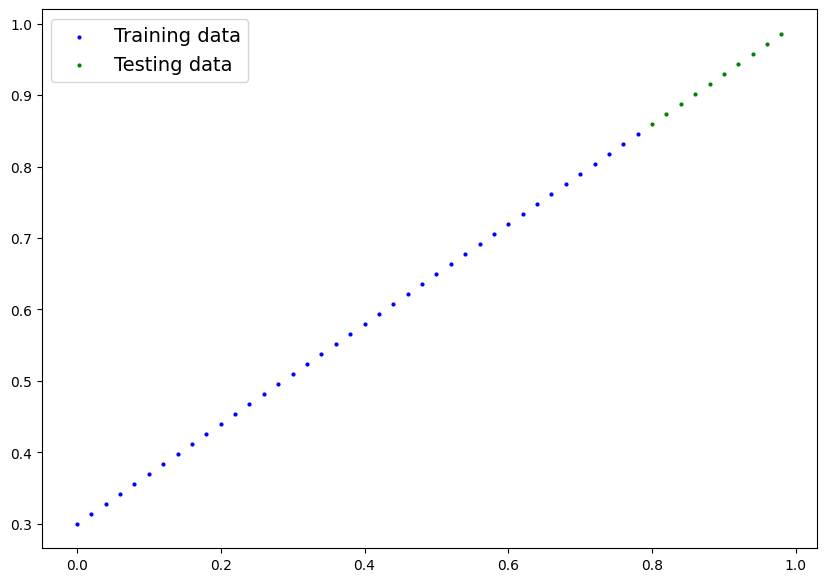

In [112]:
# Plot the data
plot_predictions()

## 2. Build model

our first PyTorch Model

In [113]:
# Create a linear regression model class

from torch import nn

class LinearRegressionModel(nn.Module): # Class inherent from nn.Module <- almost everything in PyTorch
# almost everything in PyTorch inherhits from nn.Module
# nn.Module = Lego blocks
    def __init__(self): # contructor
        super().__init__() # inherit everything from nn.Module
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float)) #torch.float = float32
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype = torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor: #<-- "x" is the input data

        return self.weights * x + self.bias #this is the linear regression formula



what our model does:

* start with random values(weight and bias) - self.weights = rand ...

* Look at the training data and adjust the random values to better represent ( or get closer to) the ideal values. (the weight/bias values we created to generate data)

How to do so?

Through two main algorithms
1. Gradient Descent
    `why we set requires_grad = True`
    to track the gradient.
2. Backward Propagation

> More notes: Gradient Descent and Backward Prop
>
>A. Gradient Descent(think of it as descenting the Gradient each iterations)
>   1. Forward pass - we get a predicted value and true value, the we calculate the error(using Mean Squared) (y - y_head)^2 or L = (y - wx)^2
>
>   2. we want to change w such that the error to be small(to 0), so we look at the dirivative dL/dw -> 2(y-wx)(-x). The sign tells us if in/de creases the w will in/de-creases lose. and how far are we from optimal
>
>   3. Gradient Descent is to adjust w based on the rule: w_new = w - η*(dL/dw), where η is the step size(learning rate)
>
>B. BackPropagation: (where it fits) - [yet to be discussed](https://www.youtube.com/watch?v=SmZmBKc7Lrs)
>   Neural Networks usually have many layers. BackPropagation answers how much did each weight contribute to the final error.  what direction each weight should change. It is done by applying chain rule from output backwards. Take a two layer example


>
> ![image.png](attachment:image.png)


Almost everything in PyTorch NN comes from torch.nn

* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter`contains the smaller parameters like weights and biases (put these together to make    `nn.Module(s)`). Create a list of layers/values/functions that the model is going to use. )
* `forward()` tells the larger blocks how to make calculations on inputs(tensors(full of data)) with `nn.Module(s)`
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data.

![image.png](attachment:image.png)

## PyTorch Model Building Essentials



some of the main classes we will encouter en PyTorch coding

* torch.nn - contains all of the buildings for computation graphs(neural networks)

* torch.nn.parameter - what parameters should our model try and learn

* torch.nn.module - the base class for all neural network modules. If you subclass it, it should overwrite forward()

* torch.optim - optimizer contains algorithm to optimize parameters

* def forward() - all nn.Module subclasess need to overwrite and define how function forward propagate.

[cheetsheet](https://docs.pytorch.org/tutorials/index.html)

 ### Checking the contents of our PyTorch model

 Now we've create a model, let's check what we have inside ...

 So we can check out our model parameters or what's inside our model using `.parameters()`

In [114]:
# Create a random seed for reproducible results
from pyexpat import model


torch.manual_seed(42)

# Instantiate the model(sublass of nn.Module)

model_0 = LinearRegressionModel()
list(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [115]:
#list of named parameters
model_0.state_dict() # adjusting the weights and bias to close to the known parameters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [116]:
weight,bias

(0.7, 0.3)

### Making Prediction using `torch.inference_mode()`

To Check our model's predictive power, let see how it predicts `y_test` based on `X_test`

when we pass our data to the model, it's going to run it through the forward function.
>inference simply means 推理

In [117]:
# Make predictions with model

with torch.inference_mode(): # inference mode = no tracking of gradients
    y_preds = model_0(X_test)

y_preds

"""
Other way to make predictions is just to do
y_preds = model_0.forward(X_test). in this case,
PyTorch will still track gradients.
with torch.inference_mode() is better for inference(making predictions) because it
saves memory by not tracking gradients.

with toruch.no_grad() is another way to do this, but it is not as efficient as
torch.inference_mode().

"""



'\nOther way to make predictions is just to do\ny_preds = model_0.forward(X_test). in this case,\nPyTorch will still track gradients.\nwith torch.inference_mode() is better for inference(making predictions) because it\nsaves memory by not tracking gradients.\n\nwith toruch.no_grad() is another way to do this, but it is not as efficient as\ntorch.inference_mode().\n\n'

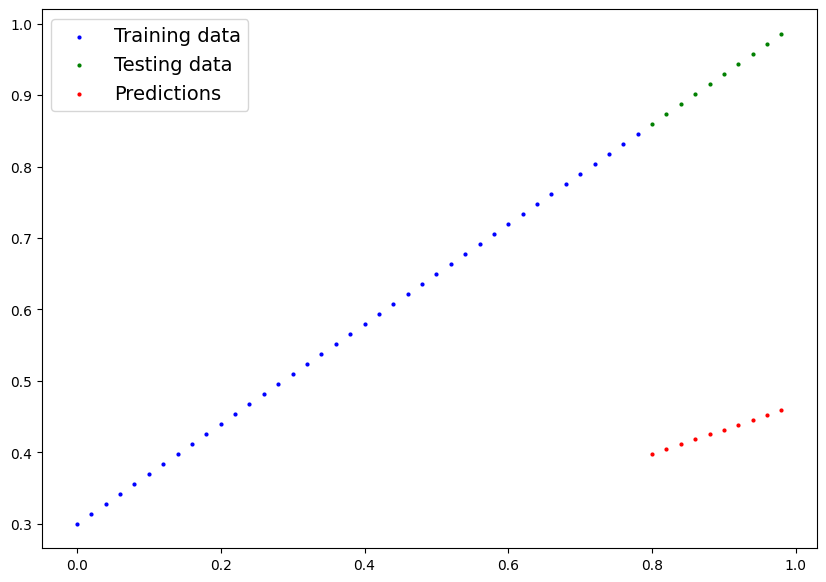

In [118]:
plot_predictions(predictions=y_preds)
# we can see from the graph that the model is way off.

## 3. Train Model

the whole idea of trainning a model is for a model to move from some *unknown* parameters to some known parameters.

One way to measure how poor(wrong) the predictions are is the loss functions. (Criterion/cost function)

torch.nn() includes different ways of calculating loss functions.


Things we need to train: 
* **Loss Function:** A function to measure how wrong your model's predictions are(lower the better). PyTorch has plenty of built-in loss functions in torch.nn. eg 
    *  Mean absolute error or L1Lose (MAE) for regression problems (torch.nn.L1Loss()). 
    *  Binary cross entropy for binary classification problems (torch.nn.BCELoss()).

* **[Optimizer](https://docs.pytorch.org/docs/stable/optim.html):** Takes into account the loss of a model and adjusts the models' parameters (e.g. weight & bias). to improve loss function. 
    * Stochastic gradient descent (torch.optim.SGD()). 
    * Adam optimizer (torch.optim.Adam()).

    inside a optimizer, you usually have to set two parameters 
    * params - the model's parameters to be optimized.
    * lr(learning rate)
And specifically for PyTorch, we need 
* a tranning loop
* a testing loop


In [119]:
# Set up a loss function 
loss_fn = nn.L1Loss() # MAE

# or loss_fn = torch.mean(torch.abs(y_preds - y_test))



# Set up a optimizaer 
# some inputs include: params to optimize, learning rate, momentum, weight decay
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01 )

>**Q:** Which loss function and optimizer should I use?
>
>**A:** Depends. A regression is good with L1Loss and optim.SGD. 
>    but for classification, a loss function of Binary Cross Entropy might work better. 

### Building a tranning loop in PyTorch



A couple of things we need in a training loop. 

0. loop through data and do ...
1. forward pass(involves data moving through our models `forward()` function. 
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zeor grad
4. Loss Backward (backward propagation to calculate the gradients of each of the parameters of our model with respect to the loss). aka **backward propagation**
5. Optimizer Step - use the optimize to adjust model's parameters to try and improve loss. aka **gradient descent**

In [120]:
# An epoch is one loop through the data 
epochs = 100 #this is a hyperparameter(set it ourselves)

# step 0. Loop through the data 
for epoch in range(epochs):
    # set the model to training mode: set all parameters that require gradients to require gradients 
    model_0.train()
    #model_0.eval() # turns off gradient tracking. 
    # 1. Forward pass
    y_preds = model_0(x_train)  #Q: what not y_preds = model_0.forward(x_train)?
    
    # 2. Calculate the loss
    loss = loss_fn(y_preds, y_train)
    print(f"Epoch: {epoch} | Loss: {loss}")
    # 3. Optimizer zero grad
    optimizer.zero_grad() # set the gradients to zero before backpropagation
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward() # compute the gradients()
    # 5. Step the optimizer (perform gradient descent)  
    optimizer.step() # by default how the optimizer changes through the loop 
    # we have to zero them above in step 3.
    print(model_0.state_dict())


    # run each epoch and see how the model parameters change


Epoch: 0 | Loss: 0.31288138031959534
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 1 | Loss: 0.3013603389263153
OrderedDict({'weights': tensor([0.3445]), 'bias': tensor([0.1488])})
Epoch: 2 | Loss: 0.28983935713768005
OrderedDict({'weights': tensor([0.3484]), 'bias': tensor([0.1588])})
Epoch: 3 | Loss: 0.2783183455467224
OrderedDict({'weights': tensor([0.3523]), 'bias': tensor([0.1688])})
Epoch: 4 | Loss: 0.26679736375808716
OrderedDict({'weights': tensor([0.3562]), 'bias': tensor([0.1788])})
Epoch: 5 | Loss: 0.2552763521671295
OrderedDict({'weights': tensor([0.3601]), 'bias': tensor([0.1888])})
Epoch: 6 | Loss: 0.24375534057617188
OrderedDict({'weights': tensor([0.3640]), 'bias': tensor([0.1988])})
Epoch: 7 | Loss: 0.23223432898521423
OrderedDict({'weights': tensor([0.3679]), 'bias': tensor([0.2088])})
Epoch: 8 | Loss: 0.22071333229541779
OrderedDict({'weights': tensor([0.3718]), 'bias': tensor([0.2188])})
Epoch: 9 | Loss: 0.20919232070446014
OrderedDict(

#### Breakdown on what each function does


For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` | 
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Note:** The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.
>
> And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb: 
> * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
> * Zero gradients (`optimizer.zero_grad()`) *before* computing the gradients of the loss with respect to every model parameter (`loss.backward()`).
> * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).

For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.


####  Mode of PyTorch

1. Training Mode `model.train()`

    Purpose: This mode is active when the model is learning from data and adjusting its parameters.

    Behavior of specific layers:
        Dropout: Dropout layers are active, randomly setting a fraction of input units to zero during each forward pass. This prevents overfitting by reducing co-adaptation of neurons.

        Batch Normalization: Batch Normalization layers calculate and use the mean and variance of the current batch for normalization. This helps stabilize training.

    Activation: Activated by calling model.train() on your nn.Module instance.

2. Evaluation/Inference Mode `model.eval()`
    Purpose: Thisithout being dropped.

        Batch Normalization: Batch Normalization layers use the running mean and variance statistics learned during training, rather than calculating them from the current batch. This ensures consistent normalization during inference.
        
    Activation: Activated by calling model.eval() on your nn.Module instance. mode is active when the model is used to make predictions on new data, after training is complete.

    Behavior of specific layers:
        Dropout: Dropout layers are inactive; all units are passed through w

#### Print Prediction 


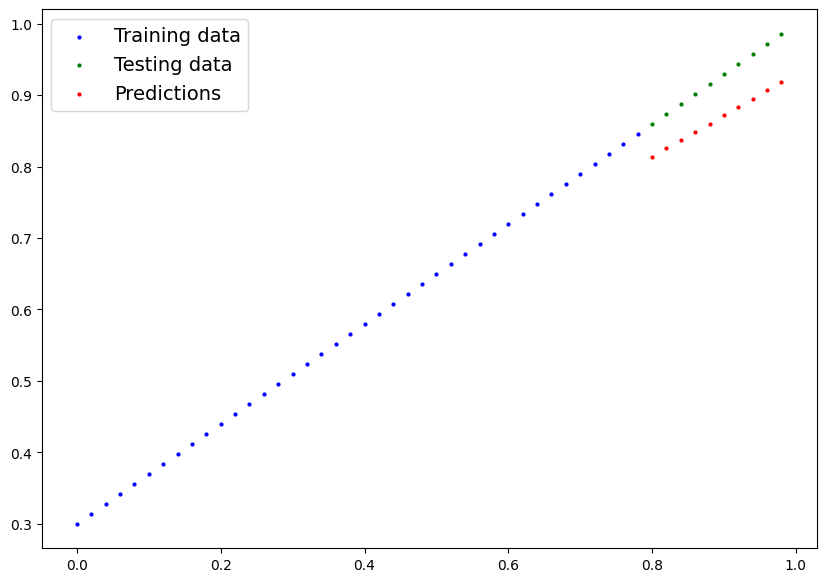

In [121]:
with torch.inference_mode():
    y_preds_new = model_0(X_test) #just forward pass 

plot_predictions(predictions=y_preds_new) # print predictions 

### Pytorch Testing Loop 



As for the testing loop (evaluating our model), the typical steps include:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the testing data once, performing its `forward()` function calculations. | `model(x_test)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_test)` | 
| 3 | Calulate evaluation metrics (optional) | Alongside the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. | Custom functions |

Notice the testing loop doesn't contain performing backpropagation (`loss.backward()`) or stepping the optimizer (`optimizer.step()`), this is because no parameters in the model are being changed during testing, they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.

![pytorch annotated testing loop](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

Let's put all of the above together and train our model for 100 **epochs** (forward passes through the data) and we'll evaluate it every 10 epochs.


we can first copy the training loop and put them into one function 

In [122]:
# An epoch is one loop through the data 
epochs = 200 #this is a hyperparameter(set it ourselves)

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# step 0. Loop through the data 
for epoch in range(epochs):
    y_preds = model_0(x_train)  #Q: what not y_preds = model_0.forward(x_train)?
    model_0.train()
    #model_0.eval() # turns off gradient tracking. 
    # 1. Forward pass
    y_preds = model_0(x_train)  #Q: what not y_preds = model_0.forward(x_train)?
    # 2. Calculate the loss
    loss = loss_fn(y_preds, y_train)
    #print(f"Epoch: {epoch} | Loss: {loss}")
    # 3. Optimizer zero grad
    optimizer.zero_grad() # set the gradients to zero before backpropagation
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward() # compute the gradients()
    # 5. Step the optimizer (perform gradient descent)  
    optimizer.step() # by default how the optimizer changes through the loop 
    # we have to zero them above in step 3.
    #print(model_0.state_dict())


    # --------------------------- #
    # -------Testing Loop ------- #
    model_0.eval() # set the model to evaluation mode. Turn off different settings in the model not needed for testing.(dropout, batchnorm etc)
    with torch.inference_mode(): # turn off gradient tracking
        test_preds = model_0(X_test) # forward pass 
        test_loss = loss_fn(test_preds, y_test) # run loss function
        # no need for backward pass or optimizer step because we are not training the model here
        #no need for optimizer step because we are not training the model here
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().cpu().numpy()) # so that it can be plotted.
            test_loss_values.append(test_loss.detach().cpu().numpy())
            print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")



Epoch: 0 | Train Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 10 | Train Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 20 | Train Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 30 | Train Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Epoch: 40 | Train Loss: 0.010716589167714119 | Test Loss: 0.024059748277068138
Epoch: 50 | Train Loss: 0.0072835334576666355 | Test Loss: 0.016474086791276932
Epoch: 60 | Train Loss: 0.0038517764769494534 | Test Loss: 0.008201557211577892
Epoch: 70 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 80 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 90 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 100 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 110 | Train Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 120 | Train Loss: 0.008932482451200485 | Test L

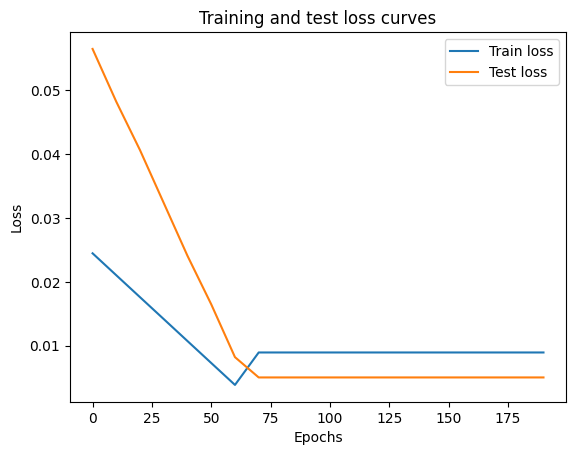

In [123]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
print()
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()



In [124]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


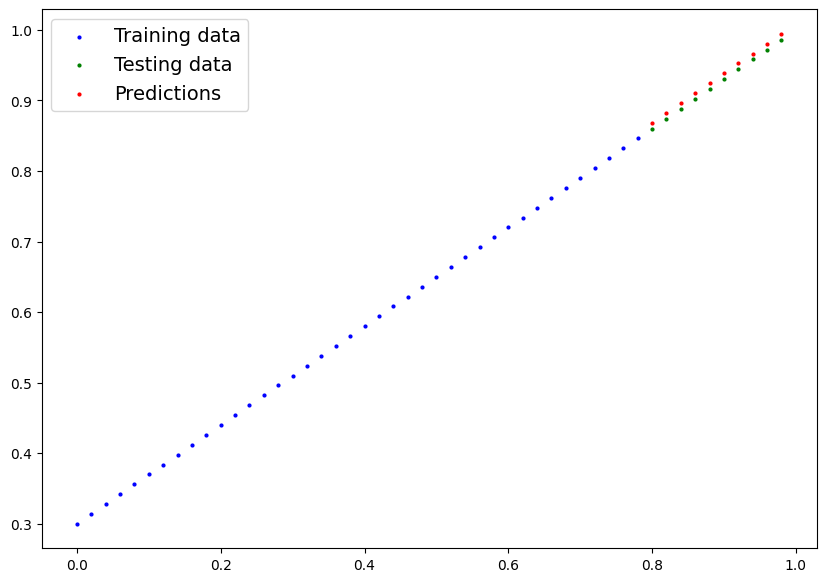

In [125]:
with torch.inference_mode():
    y_preds_new = model_0(X_test) #just forward pass 

plot_predictions(predictions=y_preds_new) # print predictions 

## Saving/loading a model in PyTorch

Let say we have trained the model, how can we save it such that thet model can be applied to re-run more testing...

There are three main methods 
1. `torch.save()` - allows you save a pytorch object in python pickle formet. 
2. `torch.load()` - allows you to load a pytorch object saved in pickly format. 
3. `torch.nn.Module.load_state_dict()` - allows you to load a module's saved dictionary. (recommended)

Just saving the state_dic() is recommended for Inference. 

We can also save an entire model if needed, which will be covered later on. 


[Extra-Curriculum](https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html)

In [126]:
model_0.state_dict() # saving the model's parameters in simply dic

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Saving our Pytorch Model

from pathlib import Path # dealing with files. 
from google.colab import drive
drive.mount('/content/drive')
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True) # create the directory if it doesn't exist

# 2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_0.pth" # or .pt
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME



# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


CWD: /content
Model path: /content/models/01_pytorch_workflow_model_0.pth
File exists: True
Directory listing:
  - models/01_pytorch_workflow_model_0.pth
